In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset
df = pd.read_csv("dataframe_.csv")

In [3]:
# 5 samples of the dataset
df.sample(5)

,input,output
1088,-117.609424,128.249695
676,-27.972030,-60.640736
100,-58.988196,-42.242901
791,-104.366669,-46.000000
1688,26.692772,-111.741529


In [4]:
# Shape of the df
df.shape

(1697, 2)

In [5]:
# info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [6]:
# There is 1 missing column in input and output 
df.isna().sum()

input     1
output    1
dtype: int64

In [7]:
# Dropping nan values because only 1 row is nan
df.dropna(inplace=True)

In [8]:
df.isna().sum()

input     0
output    0
dtype: int64

In [9]:
# We have duplicate values 
df.duplicated().sum()

606

In [10]:
# droping duplicate values
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
# Shape after cleaninig
df.shape

(1090, 2)

### Doing EDA of the dataset

<AxesSubplot:xlabel='input', ylabel='Density'>

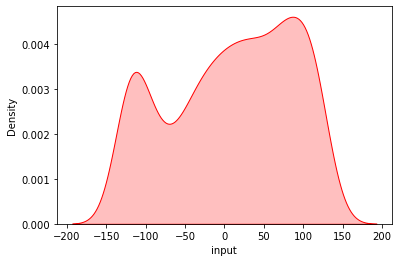

In [13]:
sns.kdeplot(x=df["input"],shade=True, color='r')

<AxesSubplot:xlabel='output', ylabel='Density'>

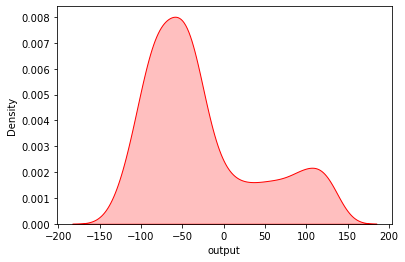

In [14]:
sns.kdeplot(x=df["output"],shade=True, color='r')

### Observation:- our input and output are approximately gaussian distributed

<AxesSubplot:>

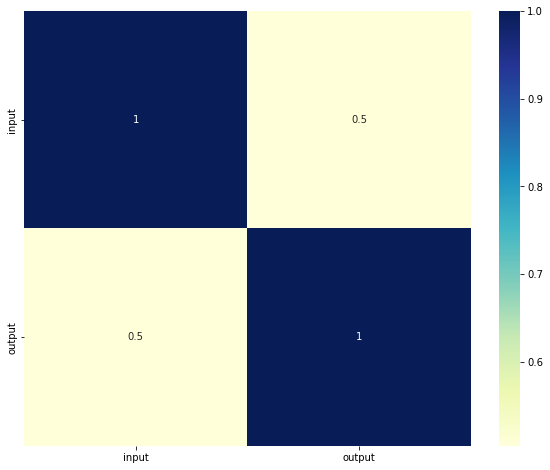

In [15]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), cmap="YlGnBu",annot=True)

<AxesSubplot:xlabel='input', ylabel='output'>

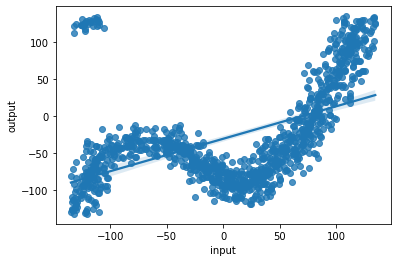

In [16]:
sns.regplot(x="input", y="output", data=df)

### Observation
* Our input and output highly correlated to each other which is good
* Our data is non linear so regressin line would perform worst

### Handeling the outliers

<AxesSubplot:xlabel='input'>

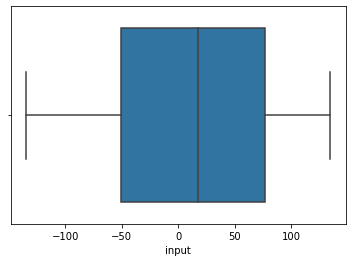

In [17]:
# Checking for outliers
sns.boxplot(df["input"])

In [18]:
# Handeling the outliers
def outliers_imputation_mild(df, column):
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_fence = df[column].quantile(0.25) - (IQR * 1.5)
    upper_fence = df[column].quantile(0.75)+(IQR * 1.5)
    print(column)
    print("IQR:", IQR)
    print(f"Lower Fence {column}:", lower_fence)
    print(f"Upper Fence {column}:", upper_fence)
    print("____________________________________________")
    df.loc[df[column] <= lower_fence, column] = lower_fence
    df.loc[df[column] >= upper_fence, column] = upper_fence

In [19]:
outliers_imputation_mild(df, "input")

input
IQR: 127.5224345025
Lower Fence input: -242.32500868375
Upper Fence input: 267.76472932625
____________________________________________


In [20]:
# Splitting dataset into dependent and independent variables
X = pd.DataFrame(df["input"], columns=["input"])
y = df["output"]

In [21]:
# Now splitting the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

### Model Building and for soring we will use r2 score 
* .score method internally uses r_2 score

In [22]:
# Using polynomial regressoin
poly = PolynomialFeatures(degree=7, include_bias=False)

In [23]:
X_train_trf = poly.fit_transform(X_train)

In [24]:
X_test_trf = poly.transform(X_test)

In [25]:
# Polynomial regression vs normal regression

In [26]:
linear_regression = LinearRegression()

In [27]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [28]:
linear_regression.score(X_test, y_test)

0.1964494729471956

In [29]:
linear_regression_poly = LinearRegression()

In [30]:
linear_regression_poly.fit(X_train_trf, y_train)

LinearRegression()

In [31]:
linear_regression_poly.score(X_test_trf, y_test)

0.667528847366397

In [32]:
ab = AdaBoostRegressor()

In [33]:
ab.fit(X_train_trf, y_train)

AdaBoostRegressor()

In [34]:
ab.score(X_test_trf, y_test)

0.6851613731453046

In [37]:
xgb = XGBRegressor()

In [38]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [39]:
xgb.score(X_test, y_test)

0.5062095271788183

In [40]:
svr = SVR()

In [41]:
svr.fit(X_train, y_train)

SVR()

In [42]:
svr.score(X_test, y_test)

0.615389808029884

In [43]:
# Hyper parameter-tuning for randrom forest

In [44]:
params = {
    "n_estimators" : [ 110, 120],
    "criterion" : ["squared_error", "absolute_error", "poisson"],
    "max_depth" : [2, 3],
    "min_samples_split" : [2, 3],
    "min_samples_leaf" : [2, 3],
    "min_weight_fraction_leaf" : [0.2, 0.3],
    "random_state" : [49, 100],
    "ccp_alpha" : [0.2, 0.3]
}

In [45]:
gscv_rf = GridSearchCV(rf, param_grid=params, cv=2)

In [46]:
gscv_rf.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(oob_score=True),
             param_grid={'ccp_alpha': [0.2, 0.3],
                         'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [2, 3], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3],
                         'min_weight_fraction_leaf': [0.2, 0.3],
                         'n_estimators': [110, 120],
                         'random_state': [49, 100]})

In [47]:
gscv_rf.best_params_

{'ccp_alpha': 0.2,
 'criterion': 'absolute_error',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.2,
 'n_estimators': 120,
 'random_state': 100}

In [48]:
rf_best = RandomForestRegressor(ccp_alpha= 0.2, criterion='absolute_error', max_depth=3, min_samples_leaf=2, 
                                min_samples_split=2, min_weight_fraction_leaf=0.2, n_estimators=120, 
                                random_state=100)

In [49]:
rf.fit(X_train, y_train)

RandomForestRegressor(oob_score=True)

In [50]:
rf.score(X_test, y_test)

0.6004917694754618

### Best Accuracy is 0.6851613731453046 by Adaboost regression